# 1. Data preparation and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/food-allergy-analysis-Zenodo.csv')

In [3]:
df.shape

(333200, 50)

In [4]:
df.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [5]:
df.isnull().sum()

SUBJECT_ID                      0
BIRTH_YEAR                      0
GENDER_FACTOR                   0
RACE_FACTOR                     0
ETHNICITY_FACTOR                0
PAYER_FACTOR                    0
ATOPIC_MARCH_COHORT             0
AGE_START_YEARS                 0
AGE_END_YEARS                   0
SHELLFISH_ALG_START        327954
SHELLFISH_ALG_END          332149
FISH_ALG_START             331404
FISH_ALG_END               332673
MILK_ALG_START             325911
MILK_ALG_END               328620
SOY_ALG_START              330781
SOY_ALG_END                331769
EGG_ALG_START              327135
EGG_ALG_END                329907
WHEAT_ALG_START            332054
WHEAT_ALG_END              332512
PEANUT_ALG_START           324547
PEANUT_ALG_END             331108
SESAME_ALG_START           332434
SESAME_ALG_END             333022
TREENUT_ALG_START          333199
TREENUT_ALG_END            333200
WALNUT_ALG_START           332496
WALNUT_ALG_END             333034
PECAN_ALG_STAR

- The "_START" columns represents the age when a patient was FIRST listed as having that specific allergy or condition
    - We will keep this columns and put NaN where there are mission values
    - We will create an boolean additionals column give as the status of the allergy (True/False)
- The "_END" columns represents the age when a patient was LAST listed as having that specific allergy or condition

In [6]:
# All the column names that contain '_END' in their name along with specific asthma-related columns
end_columns = [col for col in df.columns if '_END' in col] + ['FIRST_ASTHMARX', 'LAST_ASTHMARX', 'NUM_ASTHMARX']
end_columns

['AGE_END_YEARS',
 'SHELLFISH_ALG_END',
 'FISH_ALG_END',
 'MILK_ALG_END',
 'SOY_ALG_END',
 'EGG_ALG_END',
 'WHEAT_ALG_END',
 'PEANUT_ALG_END',
 'SESAME_ALG_END',
 'TREENUT_ALG_END',
 'WALNUT_ALG_END',
 'PECAN_ALG_END',
 'PISTACH_ALG_END',
 'ALMOND_ALG_END',
 'BRAZIL_ALG_END',
 'HAZELNUT_ALG_END',
 'CASHEW_ALG_END',
 'ATOPIC_DERM_END',
 'ALLERGIC_RHINITIS_END',
 'ASTHMA_END',
 'FIRST_ASTHMARX',
 'LAST_ASTHMARX',
 'NUM_ASTHMARX']

In [7]:
df = df.drop(columns=end_columns)

In [8]:
# Mapping dictionary for gender values
gender_mapping = {
    'S1 - Female': 'F',
    'S0 - Male': 'M'
}

# Map the gender values
df['GENDER_FACTOR'] = df['GENDER_FACTOR'].map(gender_mapping)

# Verify the changes
print("Unique values in GENDER_FACTOR after mapping:")
print(df['GENDER_FACTOR'].value_counts())

Unique values in GENDER_FACTOR after mapping:
GENDER_FACTOR
M    169032
F    164168
Name: count, dtype: int64


In [9]:
# Mapping dictionary for race values
race_mapping = {
    'R0 - White': 'White',
    'R1 - Black': 'African American',
    'R2 - Asian or Pacific Islander': 'Asian/Pacific Islander',
    'R3 - Other': 'Other',
    'R4 - Unknown': 'Unknown'
}

# Map the race values
df['RACE_FACTOR'] = df['RACE_FACTOR'].map(race_mapping)

# Verify the changes
print("Unique values in RACE_FACTOR after mapping:")
print(df['RACE_FACTOR'].value_counts())

Unique values in RACE_FACTOR after mapping:
RACE_FACTOR
White                     183308
African American           97795
Unknown                    40940
Asian/Pacific Islander      9152
Other                       2005
Name: count, dtype: int64


In [10]:
# Mapping dictionary for ethnicity values
ethnicity_mapping = {
    'E0 - Non-Hispanic': 'Non-Hispanic',
    'E1 - Hispanic': 'Hispanic'
}

# Map the race values
df['ETHNICITY_FACTOR'] = df['ETHNICITY_FACTOR'].map(ethnicity_mapping)

# Verify the changes
print("Unique values in ETHNICITY_FACTOR after mapping:")
print(df['ETHNICITY_FACTOR'].value_counts())

Unique values in ETHNICITY_FACTOR after mapping:
ETHNICITY_FACTOR
Non-Hispanic    317868
Hispanic         15332
Name: count, dtype: int64


In [11]:
# Mapping dictionary for payer values
payer_mapping = {
    'P0 - Non-Medicaid': 'Non-Medicaid',
    'P1 - Medicaid': 'Medicaid'
}

# Map the race values
df['PAYER_FACTOR'] = df['PAYER_FACTOR'].map(payer_mapping)

# Verify the changes
print("Unique values in PAYER_FACTOR after mapping:")
print(df['PAYER_FACTOR'].value_counts())

Unique values in PAYER_FACTOR after mapping:
PAYER_FACTOR
Non-Medicaid    246340
Medicaid         86860
Name: count, dtype: int64


In [12]:
# All the column names that end with '_START'
start_columns = [col for col in df.columns if col.endswith('_START')]
start_columns

['SHELLFISH_ALG_START',
 'FISH_ALG_START',
 'MILK_ALG_START',
 'SOY_ALG_START',
 'EGG_ALG_START',
 'WHEAT_ALG_START',
 'PEANUT_ALG_START',
 'SESAME_ALG_START',
 'TREENUT_ALG_START',
 'WALNUT_ALG_START',
 'PECAN_ALG_START',
 'PISTACH_ALG_START',
 'ALMOND_ALG_START',
 'BRAZIL_ALG_START',
 'HAZELNUT_ALG_START',
 'CASHEW_ALG_START',
 'ATOPIC_DERM_START',
 'ALLERGIC_RHINITIS_START',
 'ASTHMA_START']

In [13]:
# Create new binary columns fit the classification machine learning model
for col in start_columns:
    new_col_name = col.replace('_START', '')
    df[new_col_name] = df[col].notnull().astype(bool)

In [14]:
# Get all the alergy boolean columns
allergy_bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
if 'ATOPIC_MARCH_COHORT' in allergy_bool_columns: allergy_bool_columns.remove('ATOPIC_MARCH_COHORT')

In [15]:
# Create a new column 'NUM_ALLERGIES' that counts the number of allergies for each subject
df['NUM_ALLERGIES'] = df[allergy_bool_columns].sum(axis=1).astype(int)

In [16]:
df.shape

(333200, 47)

In [17]:
df.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
SHELLFISH_ALG_START        float64
FISH_ALG_START             float64
MILK_ALG_START             float64
SOY_ALG_START              float64
EGG_ALG_START              float64
WHEAT_ALG_START            float64
PEANUT_ALG_START           float64
SESAME_ALG_START           float64
TREENUT_ALG_START          float64
WALNUT_ALG_START           float64
PECAN_ALG_START            float64
PISTACH_ALG_START          float64
ALMOND_ALG_START           float64
BRAZIL_ALG_START           float64
HAZELNUT_ALG_START         float64
CASHEW_ALG_START           float64
ATOPIC_DERM_START          float64
ALLERGIC_RHINITIS_START    float64
ASTHMA_START               float64
SHELLFISH_ALG                 bool
FISH_ALG            

# 1.1 Exploratory Data Analysis

In [18]:
df.iloc[3300:3325].T

,3300,3301,3302,3303,3304,3305,3306,3307,3308,3309,...,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324
SUBJECT_ID,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,...,3316,3317,3318,3319,3320,3321,3322,3323,3324,3325
BIRTH_YEAR,1997,1997,1996,1997,1998,1997,1997,1997,1997,1997,...,1997,1997,1997,1997,1995,1997,1997,1997,1997,1997
GENDER_FACTOR,F,M,F,F,M,F,F,M,F,F,...,F,F,F,M,F,M,M,M,M,F
RACE_FACTOR,African American,African American,African American,African American,African American,African American,African American,African American,African American,African American,...,African American,African American,African American,African American,African American,African American,African American,African American,African American,African American
ETHNICITY_FACTOR,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,...,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic
PAYER_FACTOR,Medicaid,Medicaid,Medicaid,Medicaid,Non-Medicaid,Medicaid,Non-Medicaid,Non-Medicaid,Non-Medicaid,Non-Medicaid,...,Non-Medicaid,Medicaid,Medicaid,Non-Medicaid,Medicaid,Medicaid,Medicaid,Medicaid,Medicaid,Non-Medicaid
ATOPIC_MARCH_COHORT,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AGE_START_YEARS,3.570157,10.718686,4.769336,5.505818,3.693361,12.717317,5.404517,6.277892,4.306639,3.997262,...,7.526352,4.013689,4.186174,4.1013,6.691307,4.125941,4.969199,4.323066,4.528405,8.062971
SHELLFISH_ALG_START,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.487337,NaN
FISH_ALG_START,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SUBJECT_ID,333200.0,166600.500000,96186.699184,1.000000,83300.750000,166600.500000,249900.250000,333200.000000
BIRTH_YEAR,333200.0,2001.261191,6.603479,1983.000000,1996.000000,2002.000000,2007.000000,2012.000000
AGE_START_YEARS,333200.0,3.942140,4.646174,-4.312115,0.021903,1.763176,7.208761,17.984942
SHELLFISH_ALG_START,5246.0,8.724076,5.273093,0.093087,3.975359,8.361396,13.078029,24.298426
FISH_ALG_START,1796.0,6.628690,5.015358,0.076660,2.235455,5.156742,10.251198,22.499658
MILK_ALG_START,7289.0,3.287408,4.098283,-60.112252,0.747433,1.420945,4.295688,25.431896
SOY_ALG_START,2419.0,3.959135,4.485301,-2.264203,0.809035,1.850787,5.761807,24.216290
EGG_ALG_START,6065.0,3.274626,3.754197,-98.866530,1.051335,1.754962,4.090349,22.160164
WHEAT_ALG_START,1146.0,4.548648,4.560735,0.156057,1.079398,2.551677,6.737166,22.839151
PEANUT_ALG_START,8653.0,5.027637,4.392665,0.000000,1.574264,3.326489,7.241615,21.524983


## 1.1 Exploratory data analysis
### SUBJECT_ID

In [20]:
duplicates = df.duplicated(subset=['SUBJECT_ID'])
num_duplicates = duplicates.sum()
print(f"Number of duplicate SUBJECT_ID entries: {num_duplicates}")

Number of duplicate SUBJECT_ID entries: 0


### BIRTH_YEAR

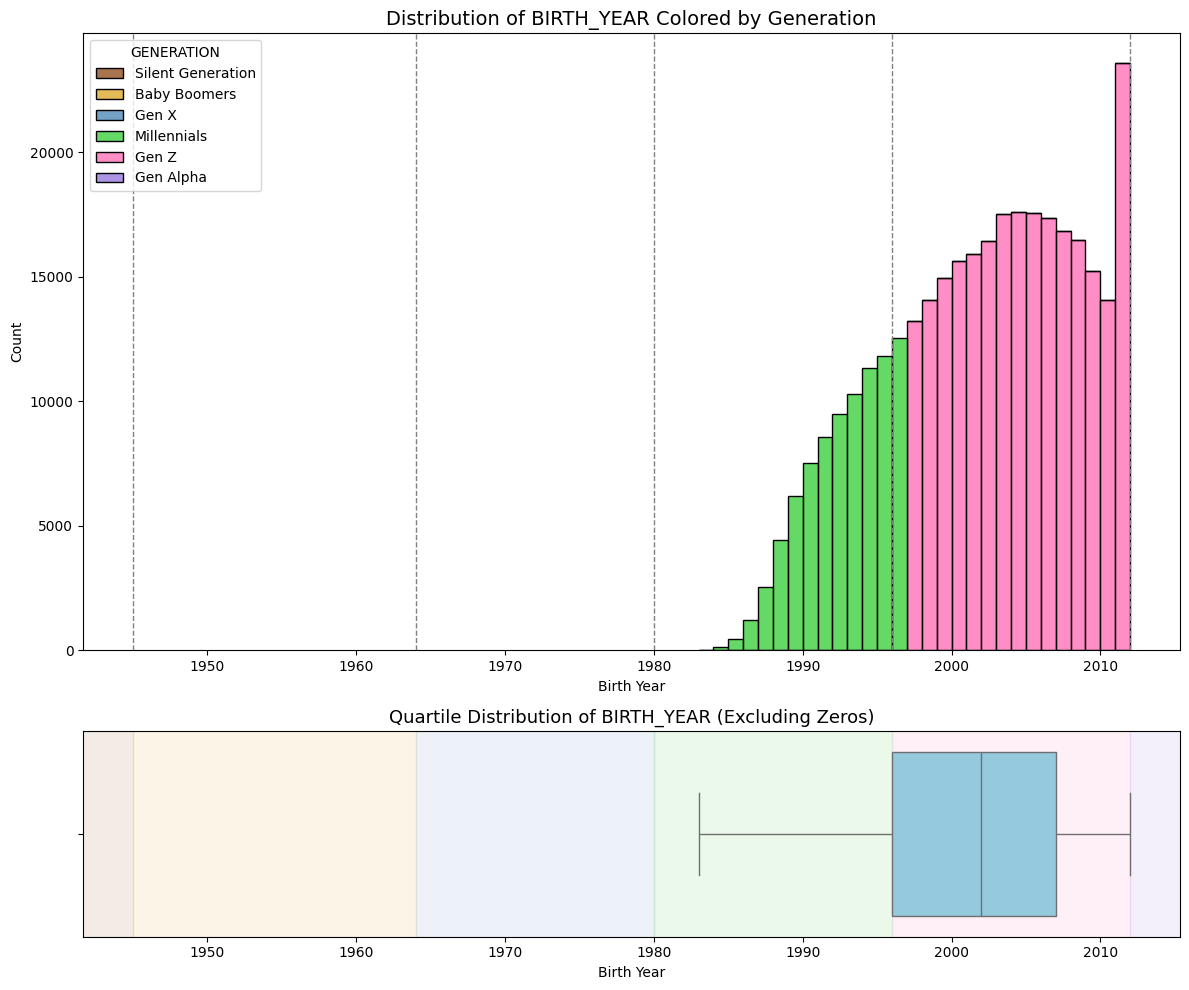

In [21]:
# Filter valid years
df_valid = df[df['BIRTH_YEAR'] != 0].copy()

# Define generation bins, labels, and colors
generation_bins = [1900, 1945, 1964, 1980, 1996, 2012, 2025]
generation_labels = [
    'Silent Generation',  # 1900–1945
    'Baby Boomers',       # 1946–1964
    'Gen X',              # 1965–1980
    'Millennials',        # 1981–1996
    'Gen Z',              # 1997–2012
    'Gen Alpha'           # 2013–2025
]
generation_colors = {
    'Silent Generation': '#8B4513',
    'Baby Boomers': '#DAA520',
    'Gen X': '#4682B4',
    'Millennials': '#32CD32',
    'Gen Z': '#FF69B4',
    'Gen Alpha': '#9370DB'
}

# Assign generation category
df_valid['GENERATION'] = pd.cut(
    df_valid['BIRTH_YEAR'],
    bins=generation_bins,
    labels=generation_labels,
    right=True
)

# Figure space
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

#  Histogram
years_range = df_valid['BIRTH_YEAR'].max() - df_valid['BIRTH_YEAR'].min()

hist = sns.histplot(
    data=df_valid,
    x='BIRTH_YEAR',
    hue='GENERATION',
    multiple='stack',
    bins=years_range,
    palette=generation_colors,
    ax=ax1
)

ax1.set_title('Distribution of BIRTH_YEAR Colored by Generation', fontsize=14)
ax1.set_xlabel('Birth Year')
ax1.set_ylabel('Count')

# Add vertical lines for generation boundaries
for boundary in generation_bins[1:-1]:
    ax1.axvline(boundary, color='gray', linestyle='--', linewidth=1)

# Boxplot
sns.boxplot(
    data=df_valid,
    x='BIRTH_YEAR',
    ax=ax2,
    color='#87CEEB'
)

ax2.set_title('Quartile Distribution of BIRTH_YEAR (Excluding Zeros)', fontsize=13)
ax2.set_xlabel('Birth Year')

# Generation shading in boxplot for clarity
for i in range(len(generation_bins) - 1):
    ax2.axvspan(
        generation_bins[i], generation_bins[i+1],
        color=generation_colors[generation_labels[i]], alpha=0.1
    )

# Synchronize x-axis for both plots
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.show()

- **GENDER_FACTOR**
- **RACE_FACTOR**
- **ETHNICITY_FACTOR**
- **PAYER_FACTOR**
- **ATOPIC_MARCH_COHORT**

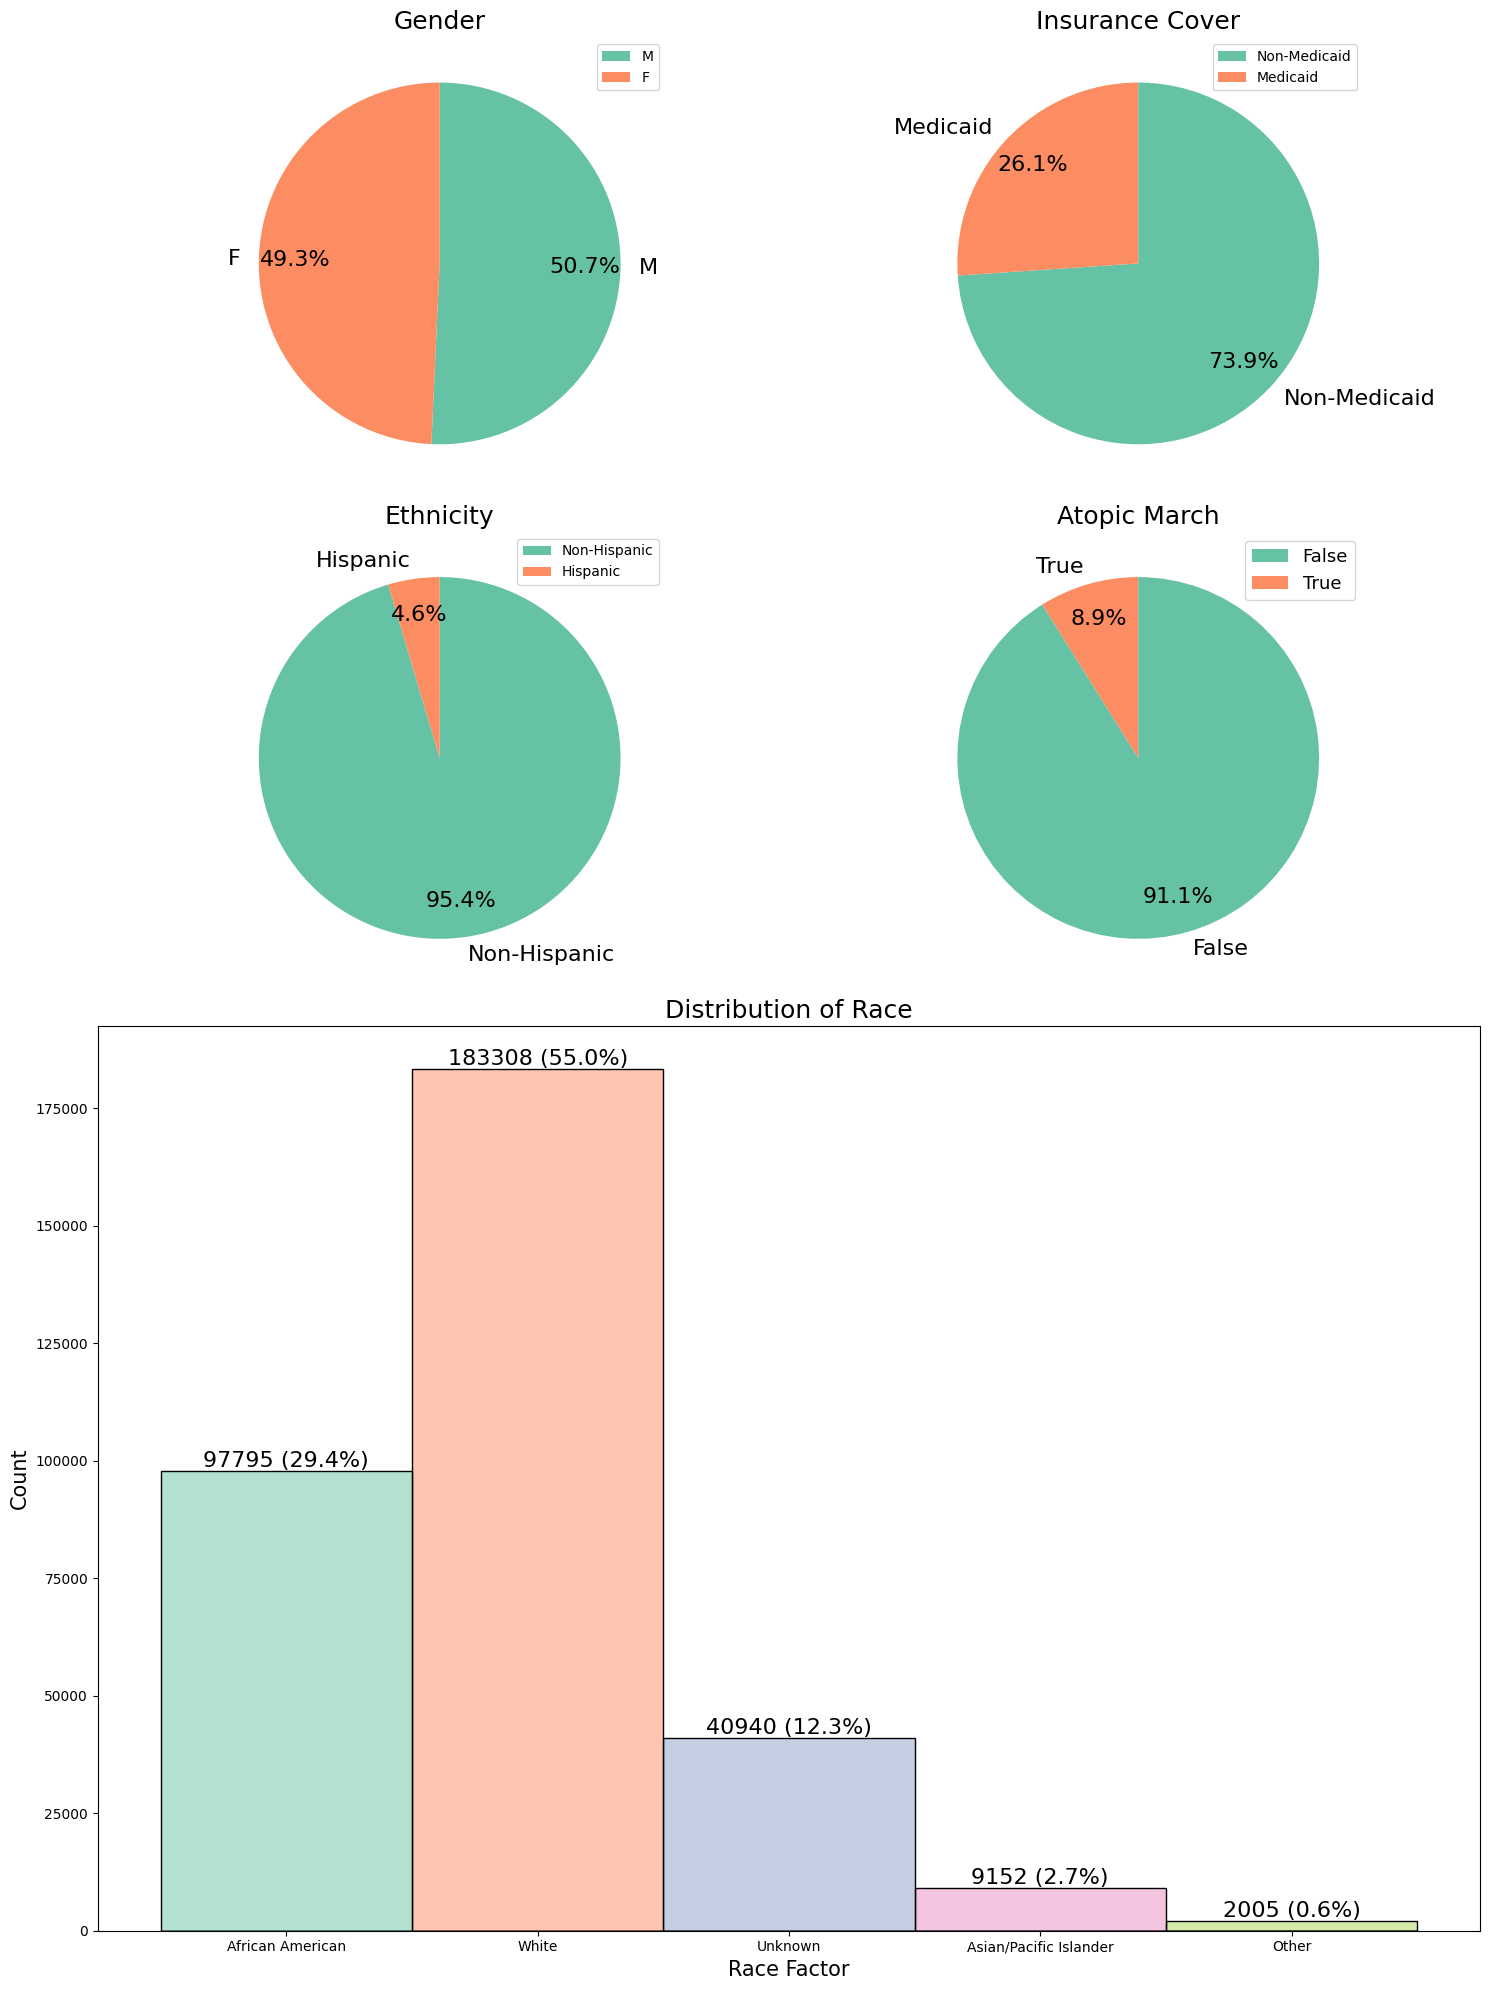

In [22]:
palette = sns.color_palette('Set2')
plt.figure(figsize=(15, 20))

# Create a 3x2 grid for subplots
gs = plt.GridSpec(3, 2, height_ratios=[1, 1, 2])

# ---- Gender ----
ax0 = plt.subplot(gs[0, 0])
data = df['GENDER_FACTOR'].value_counts()
ax0.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax0.set_title('Gender', fontsize=18)
ax0.legend(data.index, loc='best', fontsize=10)

# ---- Insurance Cover ----
ax1 = plt.subplot(gs[0, 1])
data = df['PAYER_FACTOR'].value_counts()
ax1.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax1.set_title('Insurance Cover', fontsize=18)
ax1.legend(data.index, loc='best', fontsize=10)

# ---- Ethnicity ----
ax2 = plt.subplot(gs[1, 0])
data = df['ETHNICITY_FACTOR'].value_counts()
ax2.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax2.set_title('Ethnicity', fontsize=18)
ax2.legend(data.index, loc='best', fontsize=10)

# ---- Atopic March ----
ax3 = plt.subplot(gs[1, 1])
data = df['ATOPIC_MARCH_COHORT'].value_counts()
ax3.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax3.set_title('Atopic March', fontsize=18)
ax3.legend(data.index, loc='best', fontsize=13)

# ---- Race ----
ax4 = plt.subplot(gs[2, :])
total_count = len(df['RACE_FACTOR'])

hist = sns.histplot(
    data=df,
    x='RACE_FACTOR',
    hue='RACE_FACTOR',
    palette=palette[:len(df['RACE_FACTOR'].value_counts())],
    legend=False,
    ax=ax4
)

ax4.set_title('Distribution of Race', fontsize=18)
ax4.set_xlabel('Race Factor', fontsize=15)
ax4.set_ylabel('Count', fontsize=15)

for container in hist.containers:
    counts = [rect.get_height() for rect in container]
    percentages = [count / total_count * 100 for count in counts]

    labels = []
    for count, perc in zip(counts, percentages):
        if count > 0:
            labels.append(f'{int(count)} ({perc:.1f}%)')
        else:
            labels.append('')

    hist.bar_label(container, labels=labels, fontsize=16)

plt.tight_layout()
plt.show()


# Allergy columns

In [23]:
print(f"There are {len(allergy_bool_columns)} types of allergies in this study")

There are 19 types of allergies in this study


| Column Name            | Complete Name       |
| ----------------------- | ------------------- |
| SHELLFISH_ALG           | Shellfish Allergy   |
| FISH_ALG                | Fish Allergy        |
| MILK_ALG                | Milk Allergy        |
| SOY_ALG                 | Soy Allergy         |
| EGG_ALG                 | Egg Allergy         |
| WHEAT_ALG               | Wheat Allergy       |
| PEANUT_ALG              | Peanut Allergy      |
| SESAME_ALG              | Sesame Allergy      |
| TREENUT_ALG             | Tree Nut Allergy    |
| WALNUT_ALG              | Walnut Allergy      |
| PECAN_ALG               | Pecan Allergy       |
| PISTACH_ALG             | Pistachio Allergy   |
| ALMOND_ALG              | Almond Allergy      |
| BRAZIL_ALG              | Brazil Nut Allergy  |
| HAZELNUT_ALG            | Hazelnut Allergy    |
| CASHEW_ALG              | Cashew Allergy      |
| ATOPIC_DERM             | Atopic Dermatitis   |
| ALLERGIC_RHINITIS       | Allergic Rhinitis   |
| ASTHMA                  | Asthma              |

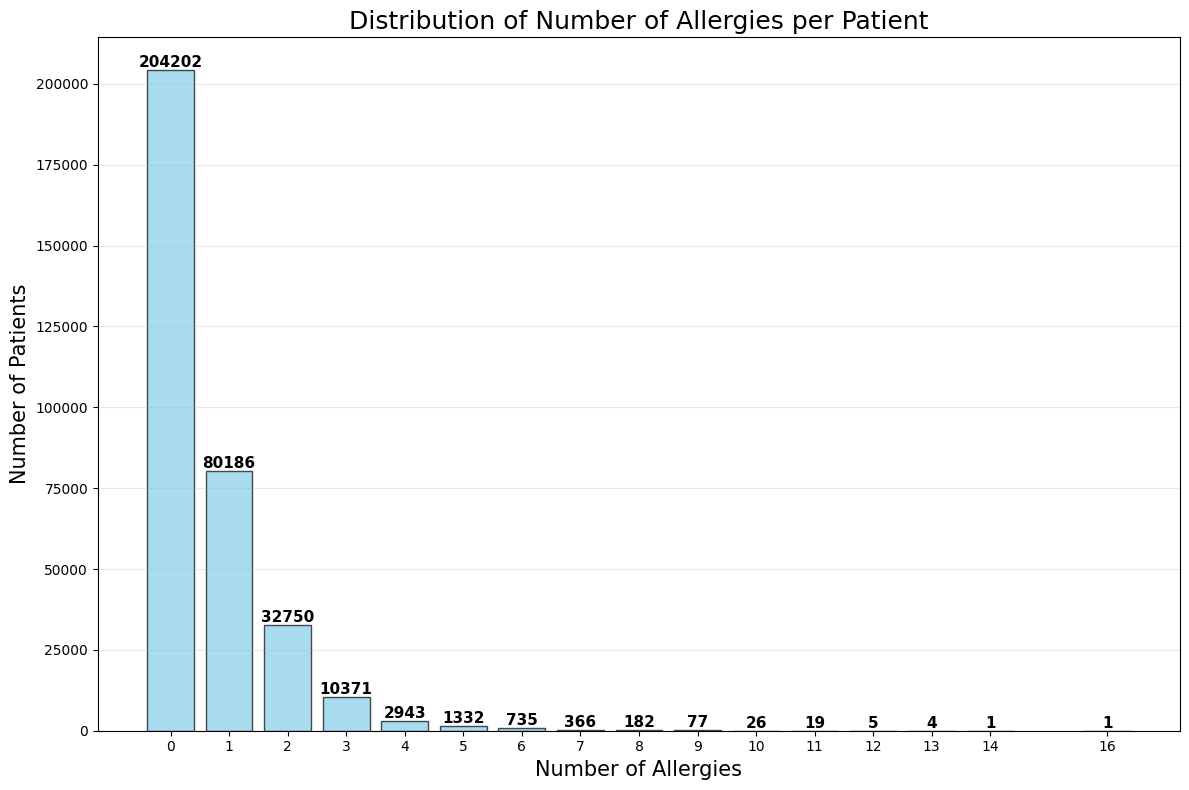

Number of Allergies  | Number of Patients | Percentage
------------------------------------------------------
         0           |       204202       |     61.3%
         1           |       80186        |     24.1%
         2           |       32750        |      9.8%
         3           |       10371        |      3.1%
         4           |        2943        |      0.9%
         5           |        1332        |      0.4%
         6           |        735         |      0.2%
         7           |        366         |      0.1%
         8           |        182         |      0.1%
         9           |         77         |      0.0%
         10          |         26         |      0.0%
         11          |         19         |      0.0%
         12          |         5          |      0.0%
         13          |         4          |      0.0%
         14          |         1          |      0.0%
         16          |         1          |      0.0%


In [58]:
allergy_counts = df['NUM_ALLERGIES'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

# --- Bar Plot ---
bars = plt.bar(allergy_counts.index, allergy_counts.values, 
               color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Number of Allergies per Patient', fontsize=18)
plt.xlabel('Number of Allergies', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)

# Add count labels on top of each bar
for bar, count in zip(bars, allergy_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks(allergy_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
total_patients = len(df)
header = f"{'Number of Allergies':^20} | {'Number of Patients':^18} | {'Percentage':^10}"
separator = "-" * len(header)

print(header)
print(separator)

for num_allergies, count in allergy_counts.items():
    percentage = (count / total_patients) * 100
    print(f"{num_allergies:^20} | {count:^18} | {percentage:>8.1f}%")

In [64]:
print("Max numeber of allergies for a patient had:" , df['NUM_ALLERGIES'].max())

Max numeber of allergies for a patient had: 16


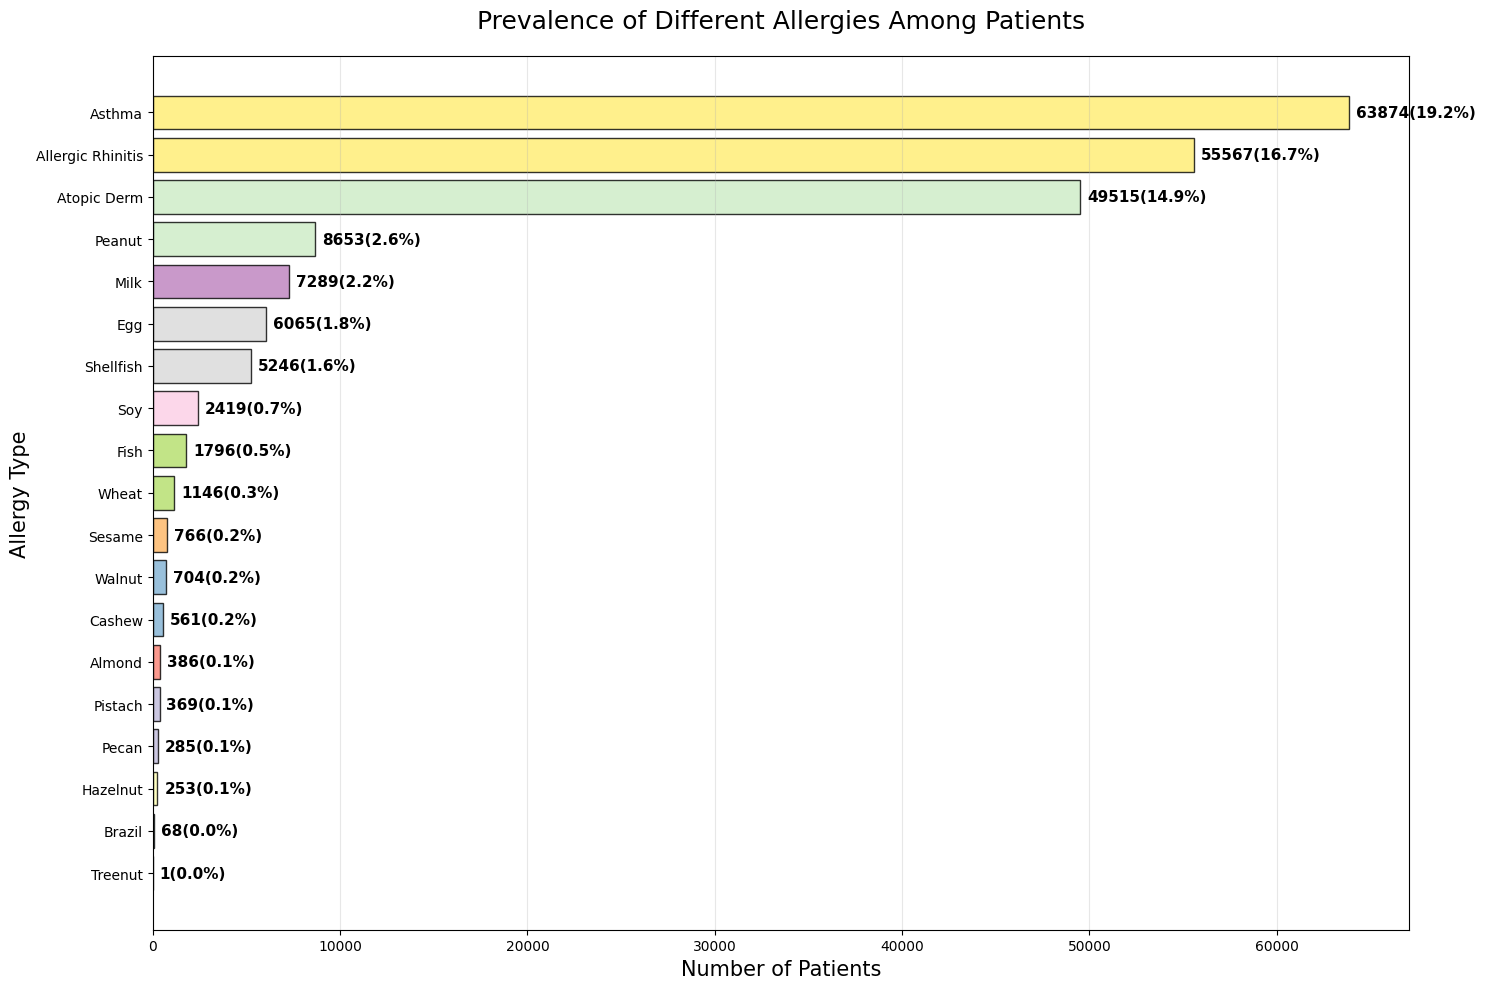

In [74]:
# Plot for Most Common Allergies
plt.figure(figsize=(15, 10))

# Calculate allergy prevalence
allergy_counts = df[allergy_bool_columns].sum().sort_values(ascending=True)
allergy_percentages = (allergy_counts / len(df) * 100).round(1)

# Create horizontal bar plot
colors = plt.cm.Set3(np.linspace(0, 1, len(allergy_counts)))
bars = plt.barh(range(len(allergy_counts)), allergy_counts, color=colors, edgecolor='black', alpha=0.8)

# Customize the plot
plt.title('Prevalence of Different Allergies Among Patients', fontsize=18, pad=20)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Allergy Type', fontsize=15)

# Set y-axis labels with cleaner names
clean_labels = []
for col in allergy_counts.index:
    if 'ALG' in col:
        clean_name = col.replace('_ALG', '').replace('_', ' ').title()
    else:
        clean_name = col.replace('_', ' ').title()
    clean_labels.append(clean_name)

plt.yticks(range(len(allergy_counts)), clean_labels)

# Add count and percentage labels on bars
for i, (count, percentage) in enumerate(zip(allergy_counts, allergy_percentages)):
    plt.text(count + len(df)*0.0011, i, f'{count}({percentage}%)', 
             va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()